In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
import kagglehub
import pandas as pd
import os

# Download latest version
path = kagglehub.dataset_download("rafsunahmad/apple-stock-price")
print("Path to dataset files:", path)

# Read the CSV file into df
df = pd.read_csv(os.path.join(path, "apple_stock.csv"))


Path to dataset files: C:\Users\habde\.cache\kagglehub\datasets\rafsunahmad\apple-stock-price\versions\1


In [14]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [15]:
print(df.head())

         Date       Open       High        Low      Close  Adj Close  \
0  2014-01-02  19.845715  19.893929  19.715000  19.754642  17.318729   
1  2014-01-03  19.745001  19.775000  19.301071  19.320715  16.938305   
2  2014-01-06  19.194643  19.528570  19.057142  19.426071  17.030676   
3  2014-01-07  19.440001  19.498571  19.211430  19.287144  16.908880   
4  2014-01-08  19.243214  19.484285  19.238930  19.409286  17.015959   

      Volume  
0  234684800  
1  392467600  
2  412610800  
3  317209200  
4  258529600  


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2475 non-null   object 
 1   Open       2475 non-null   float64
 2   High       2475 non-null   float64
 3   Low        2475 non-null   float64
 4   Close      2475 non-null   float64
 5   Adj Close  2475 non-null   float64
 6   Volume     2475 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 135.5+ KB
None


In [17]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  2475.000000  2475.000000  2475.000000  2475.000000  2475.000000   
mean     76.004968    76.845661    75.213720    76.064199    74.097124   
std      54.739063    55.389713    54.134658    54.787600    55.248195   
min      17.684999    17.911785    17.626785    17.849285    15.648315   
25%      29.592500    29.841249    29.371249    29.707500    27.131330   
50%      47.507500    47.967499    47.267502    47.599998    45.507229   
75%     132.145004   133.680000   130.495003   132.029999   130.403320   
max     196.240005   198.229996   195.279999   196.449997   195.926956   

             Volume  
count  2.475000e+03  
mean   1.380565e+08  
std    8.399674e+07  
min    3.145820e+07  
25%    8.300500e+07  
50%    1.134760e+08  
75%    1.682138e+08  
max    1.065523e+09  


In [18]:
missing_values_count = df.isnull().sum()
missing_values_count[0:10]

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
df = df.sort_values('Date')
df.reset_index(drop=True, inplace=True)

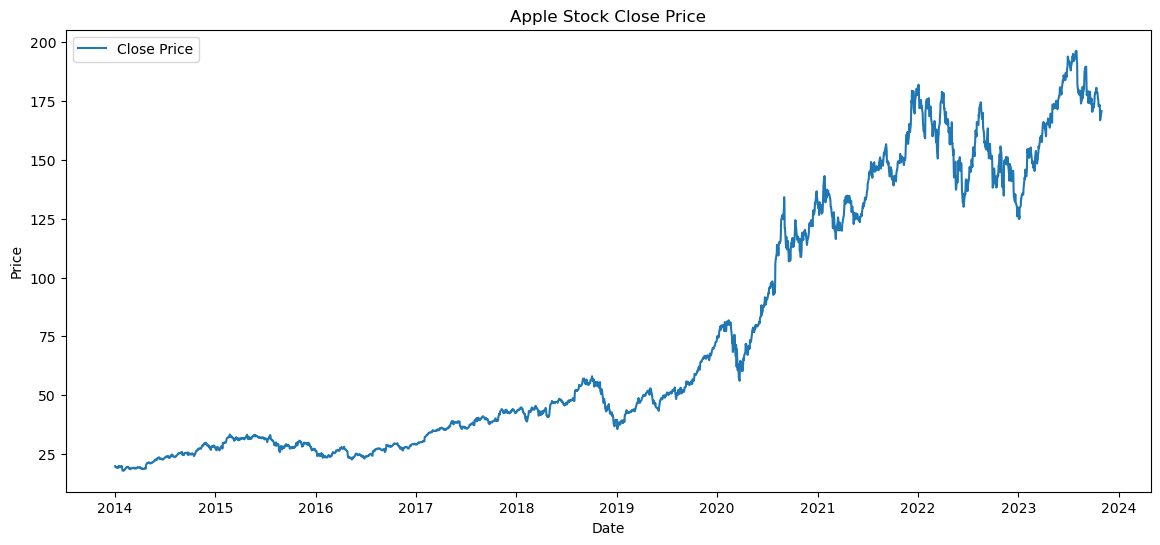

In [21]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Apple Stock Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

In [23]:
df_features = df.drop(columns=['Date'])

In [24]:
df_features.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Weekday
0,19.845715,19.893929,19.715000,19.754642,17.318729,234684800,2014,1,2,3
1,19.745001,19.775000,19.301071,19.320715,16.938305,392467600,2014,1,3,4
2,19.194643,19.528570,19.057142,19.426071,17.030676,412610800,2014,1,6,0
3,19.440001,19.498571,19.211430,19.287144,16.908880,317209200,2014,1,7,1
4,19.243214,19.484285,19.238930,19.409286,17.015959,258529600,2014,1,8,2


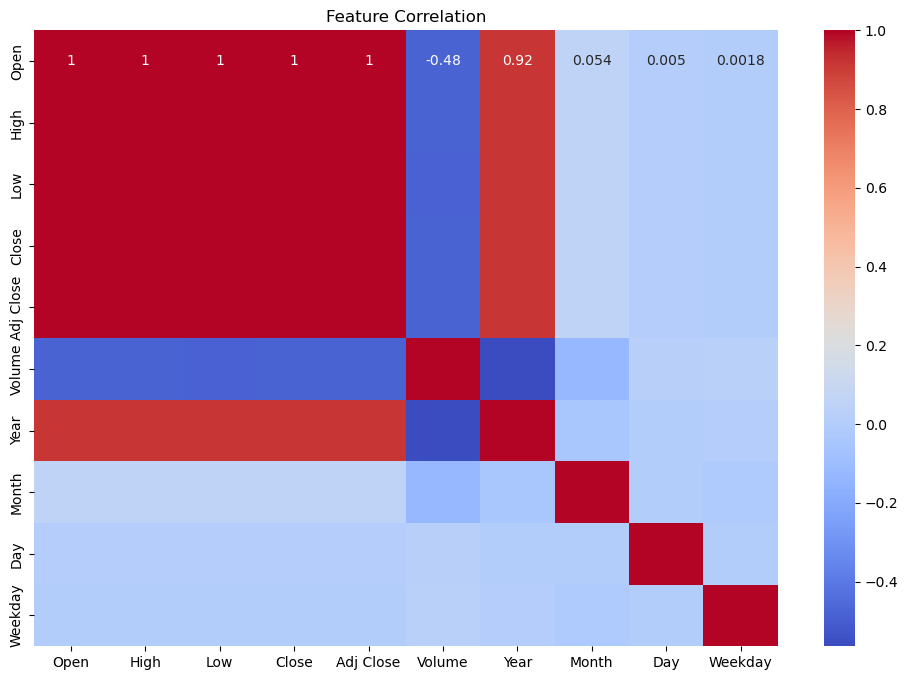

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

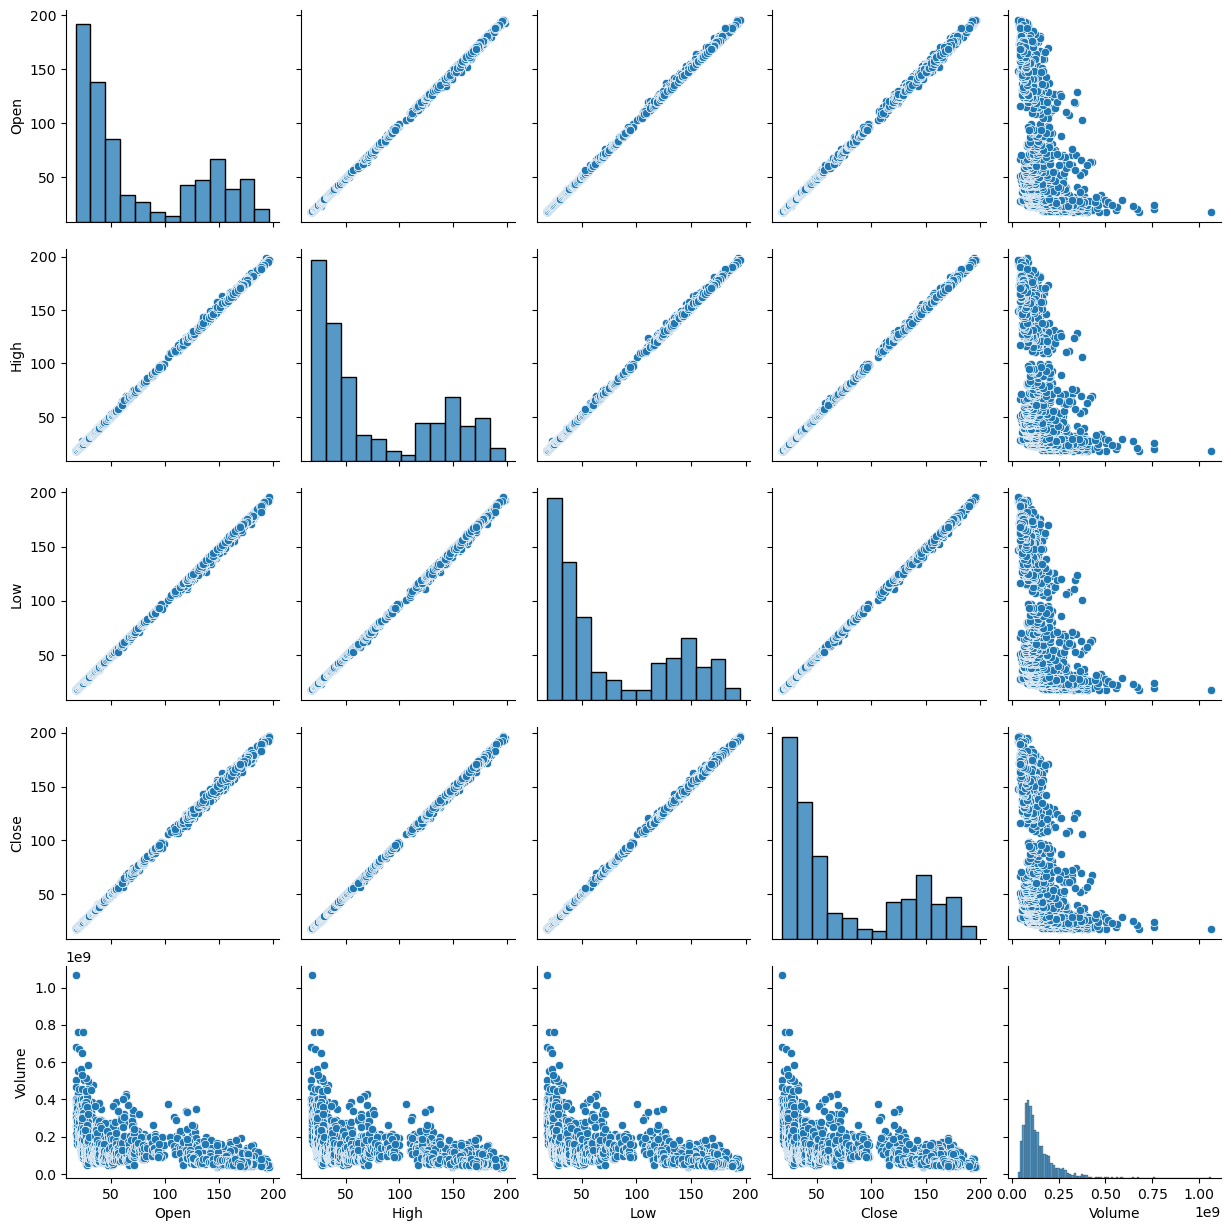

In [26]:
sns.pairplot(df_features[['Open','High','Low','Close','Volume']])
plt.show()

c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


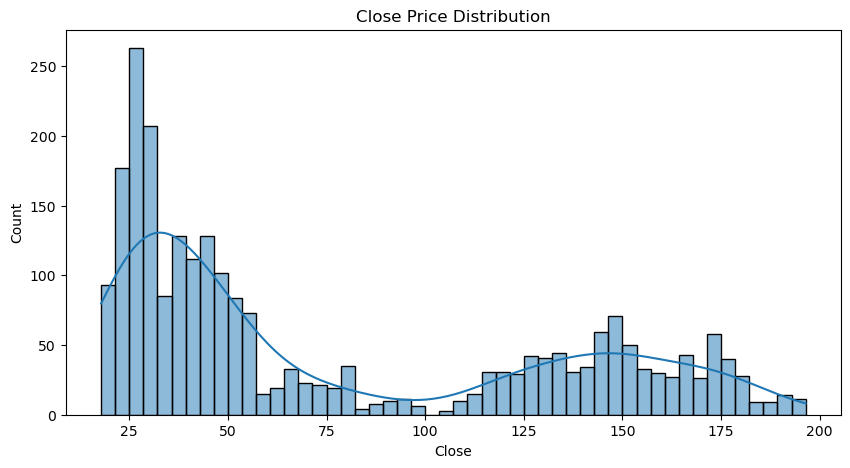

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title("Close Price Distribution")
plt.show()

c:\Users\habde\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


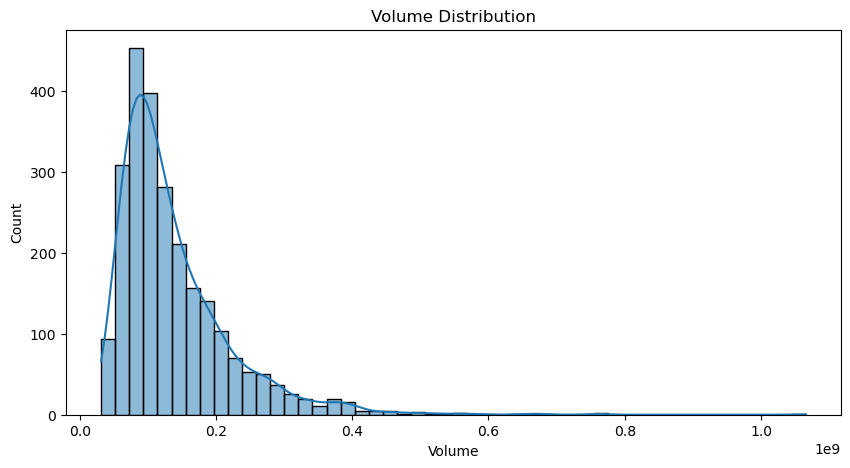

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df['Volume'], bins=50, kde=True)
plt.title("Volume Distribution")
plt.show()

In [29]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

In [30]:
scaled_df = pd.DataFrame(scaled_data, columns=df_features.columns)

In [31]:
SEQ_LEN = 60

def create_sequences(data, target_column='Close', seq_len=SEQ_LEN):
    X, y = [], []
    if isinstance(data, np.ndarray):
        if isinstance(target_column, str):
            target_idx = list(scaled_df.columns).index(target_column)
        else:
            target_idx = target_column
    else:
        target_idx = data.columns.get_loc(target_column)
    
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i, :])
        y.append(data[i, target_idx])
    return np.array(X), np.array(y)

scaled_data_array = scaled_df.values
X, y = create_sequences(scaled_data_array, target_column='Close', seq_len=SEQ_LEN)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2415, 60, 10)
Shape of y: (2415,)


In [32]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 1932
Testing samples: 483


In [33]:
def build_model(model_type, input_shape):
    model = Sequential()
    if model_type == 'RNN':
        model.add(SimpleRNN(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'LSTM':
        model.add(LSTM(50, return_sequences=False, input_shape=input_shape))
    elif model_type == 'GRU':
        model.add(GRU(50, return_sequences=False, input_shape=input_shape))
    
    model.add(Dropout(0.2))
    model.add(Dense(1))  # predict Close price
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [34]:
models = {}
histories = {}
for m in ['RNN','LSTM','GRU']:
    print(f"\nTraining {m} Model...")
    model = build_model(m, (X_train.shape[1], X_train.shape[2]))
    es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=30,
        batch_size=32,
        callbacks=[es],
        verbose=1
    )
    models[m] = model
    histories[m] = history



Training RNN Model...
Epoch 1/30


c:\Users\habde\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0916 - mae: 0.2342 - val_loss: 0.0297 - val_mae: 0.1460
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0293 - mae: 0.1337 - val_loss: 0.0224 - val_mae: 0.1289
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0165 - mae: 0.1025 - val_loss: 0.0103 - val_mae: 0.0860
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mae: 0.0860 - val_loss: 0.0178 - val_mae: 0.1231
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mae: 0.0763 - val_loss: 0.0041 - val_mae: 0.0535
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mae: 0.0650 - val_loss: 0.0119 - val_mae: 0.1006
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mae: 0.0589 - val_loss: 0.0057 - val_mae: 0.0666
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mae: 0.0561 - val_loss: 0.0033 - val_mae: 0.0505
Epoch 9/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mae: 0.0499 - v

In [35]:
for m in models:
    y_pred = models[m].predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{m} → RMSE: {rmse:.4f}, MAE: {mae:.4f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
RNN → RMSE: 0.0497, MAE: 0.0420
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
LSTM → RMSE: 0.0663, MAE: 0.0568
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU → RMSE: 0.0255, MAE: 0.0204


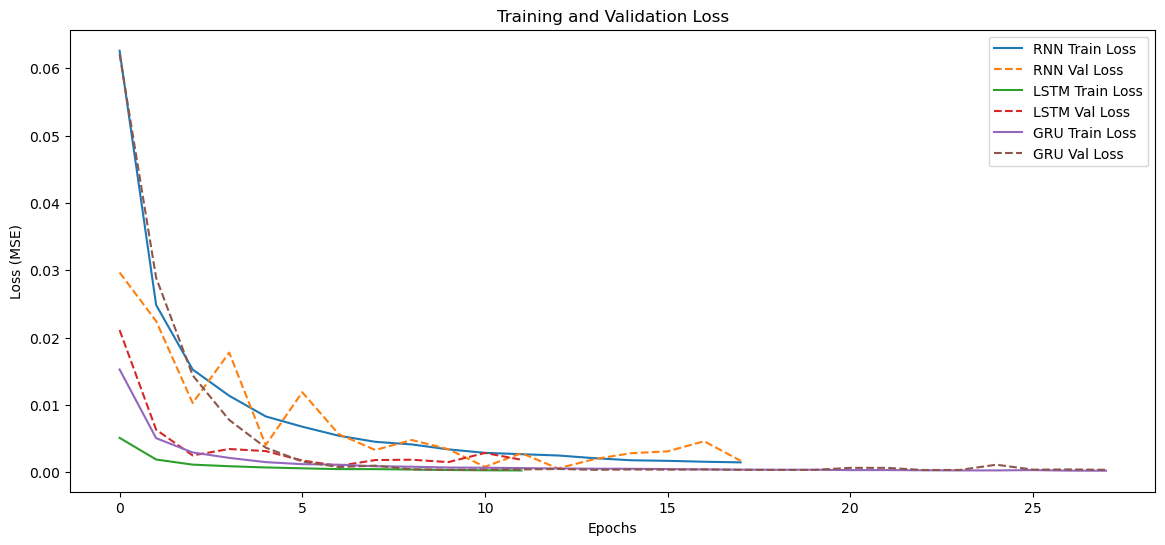

In [36]:
plt.figure(figsize=(14,6))
for m in histories:
    plt.plot(histories[m].history['loss'], label=f'{m} Train Loss')
    plt.plot(histories[m].history['val_loss'], '--', label=f'{m} Val Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


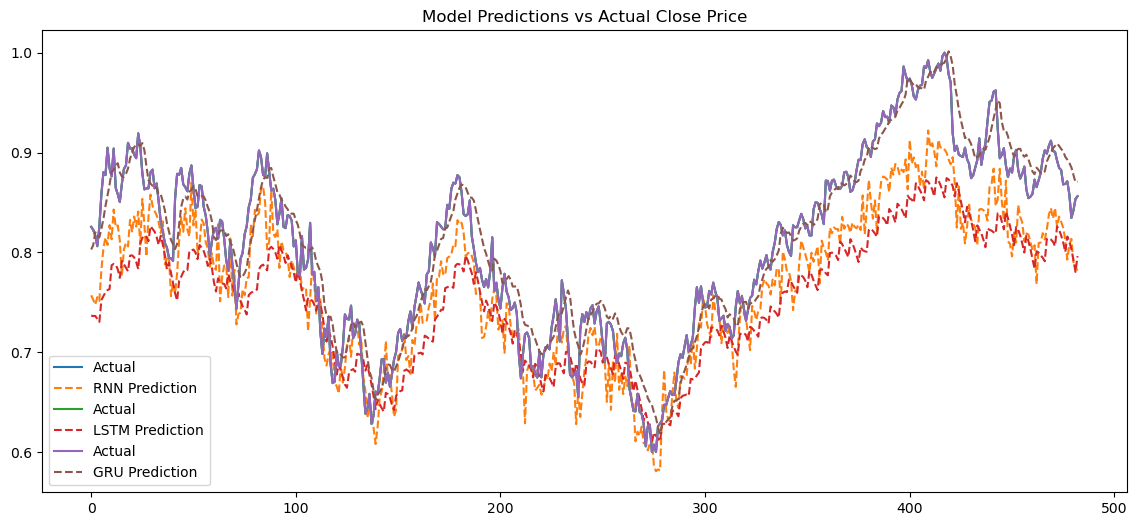

In [37]:
plt.figure(figsize=(14,6))
for m in models:
    y_pred = models[m].predict(X_test)
    plt.plot(y_test, label="Actual")
    plt.plot(y_pred, '--', label=f"{m} Prediction")
plt.title("Model Predictions vs Actual Close Price")
plt.legend()
plt.show()

In [38]:
import joblib
import pandas as pd
import numpy as np
import os
import pickle

# --- 1. Save the Scaler (Crucial for scaling new input data and inverse transforming predictions) ---
joblib.dump(scaler, "minmax_scaler.pkl")

# --- 2. Save the Trained Models ---
models_to_save = ['RNN', 'LSTM', 'GRU']
for m in models_to_save:
    models[m].save(f"{m.lower()}_model.h5")
    
# --- 3. Save the Scaled Data and SEQ_LEN metadata ---
# The model needs the last sequence of the scaled training data to make the first prediction.
# We also need the order of the columns (features)
features_columns = df_features.columns.tolist()
last_date = df['Date'].max() # Get the actual last known date

with open("metadata.pkl", "wb") as f:
    pickle.dump({
        'seq_len': SEQ_LEN, 
        'features_cols': features_columns,
        'scaled_data_for_prediction': scaled_data_array,
        'last_data_date': last_date
    }, f)

print("All models, scaler, and metadata saved successfully.")

All models, scaler, and metadata saved successfully.
